# 2. scikit-learnで統計的学習

## 2.1 はじめに

本ノートブックでは，[A tutorial on statistical-learning for scientific data processing](http://scikit-learn.org/stable/tutorial/statistical_inference/index.html)を参考に，scikit-learnにおける統計的学習について復習します．

統計的学習とは，[統計的推論](https://kotobank.jp/word/%E7%B5%B1%E8%A8%88%E7%9A%84%E6%8E%A8%E8%AB%96-103447)（有限のサンプルから母集団の統計的
特性を推し量ること）を目的とする，機械学習の一分野です．

## 2.2 下準備

### Datasets

scikit-learnでは，２次元配列でdatasetを表現します．一次元目をサンプル軸（samples axis），二次元目を特徴軸（features axis）と呼びます．

以下は，iris datasetの例です．

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
data.shape

(150, 4)

それぞれ4つのfeature（萼片長，萼片幅，花弁長，花弁幅）を持つsampleが150個あることを示しています．詳細は，`iris.DESCR`をご参照ください．

In [2]:
iris.DESCR

'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ============

外部データに対しscikit-learnを使う際は，そのデータの形状を`(n_samples, n_features)`に整える必要があります．

### 予測器（Estimator）

**フィッティング**：scikit-learnの主なAPIは，与えれたデータに予測器をフィッティングさせるためのものです．予測器は，データからあらゆる学習問題（分類，回帰，クラスタリング，次元削減）に対応可能です．

全ての予測器に対し，`fit`メソッドを介してdatasetを入力できます．

In [3]:
from sklearn import svm
clf = svm.SVC()
clf.fit(iris.data[:-1], iris.target[:-1])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

**Parameter**：予測器の全てのparameterは，初期化時に設定することもできますし，別途変数として直接設定することもできます．

In [4]:
clf2 = svm.SVC(gamma=0.001)

In [5]:
clf2.gamma=0.01

**Estimated parameter**：学習の結果，予測器は幾つかのパラメータを調整します．これらパラメータはアンダーバー（`*_`）で終わるattributeとして，ユーザに提供されます．

In [6]:
clf.support_

array([ 13,  15,  18,  23,  24,  41,  44,  50,  52,  54,  56,  57,  60,
        63,  66,  68,  70,  72,  76,  77,  78,  83,  84,  86,  98, 100,
       106, 110, 118, 119, 121, 123, 126, 127, 129, 131, 133, 134, 138,
       141, 142, 146, 147])

## 2.3 教師あり学習

[教師あり学習（supervised learning）]()では，観測データ`x`とターゲット（ラベル）データ`y`の関係性を学習します．多くの場合，`y`は長さ`n_sample`の一次元配列です．

scikit-learnの全ての教師あり学習向け予測器は，フィッティングのための`fit(x, y)`メソッドと，未知の入力`x`から`y`を予測するための`predict(x)`メソッドを持ちます．

与えられたデータの（有限個の）ラベルを予測するとき，**分類**問題と呼びます．一方で，データの（連続的な）変数を予測するとき，**回帰**問題と呼びます．scikit-learnにおける分類問題では，`y`は整数ベクトルか文字列で表現されます．

機械学習特有の用語については，[1. scikit-learn入門](https://github.com/haltaro/ml-tutorial/blob/master/01.intro_to_scikit-learn.ipynb)をご参照ください．

### 2.3.1 Nearest neighborと次元の呪い

`iris`データセットを使い，4つの特徴量から，3種類のアヤメ（[setosa](https://en.wikipedia.org/wiki/Iris_setosa)，[versicolor](https://en.wikipedia.org/wiki/Iris_versicolor)，[virginica](https://en.wikipedia.org/wiki/Iris_virginica)）を分類する問題に挑戦します．まずは，散布図をプロットしてみます．

In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets

(-0.40000000000000002, 3.0)

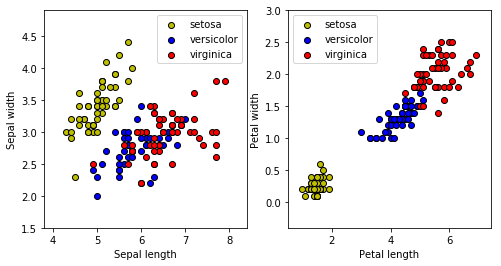

In [12]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

plt.figure(figsize=(8,4))

# Plot sepal lengths and weights
plt.subplot(1, 2, 1)
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 # x axis
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 # y axis

plt.scatter(X[y==0, 0], X[y==0, 1], c='y', cmap=plt.cm.Set1, edgecolor='k', label=iris.target_names[0])
plt.scatter(X[y==1, 0], X[y==1, 1], c='b', cmap=plt.cm.Set1, edgecolor='k', label=iris.target_names[1])
plt.scatter(X[y==2, 0], X[y==2, 1], c='r', cmap=plt.cm.Set1, edgecolor='k', label=iris.target_names[2])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Plot patel lengths and weights
plt.subplot(1, 2, 2)
x_min, x_max = X[:, 2].min() - .5, X[:, 2].max() + .5 # x axis
y_min, y_max = X[:, 3].min() - .5, X[:, 3].max() + .5 # y axis

plt.scatter(X[y==0, 2], X[y==0, 3], c='y', cmap=plt.cm.Set1, edgecolor='k', label=iris.target_names[0])
plt.scatter(X[y==1, 2], X[y==1, 3], c='b', cmap=plt.cm.Set1, edgecolor='k', label=iris.target_names[1])
plt.scatter(X[y==2, 2], X[y==2, 3], c='r', cmap=plt.cm.Set1, edgecolor='k', label=iris.target_names[2])
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend()

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

最も単純な分類器は，[K nearest neighbor](https://ja.wikipedia.org/wiki/K%E8%BF%91%E5%82%8D%E6%B3%95)（KNN，k近傍法）です．このモデルは，テストデータ$X_{test}$の近傍に存在する$k$個の訓練データ$N_k(X_{test})$の多数決で，$X_{test}$のラベルを予測します．特に$k=1$のとき，**最近傍法**と呼ばれ，分類結果は[ボロノイ分割](https://ja.wikipedia.org/wiki/%E3%83%9C%E3%83%AD%E3%83%8E%E3%82%A4%E5%9B%B3)となることが知られています．

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors

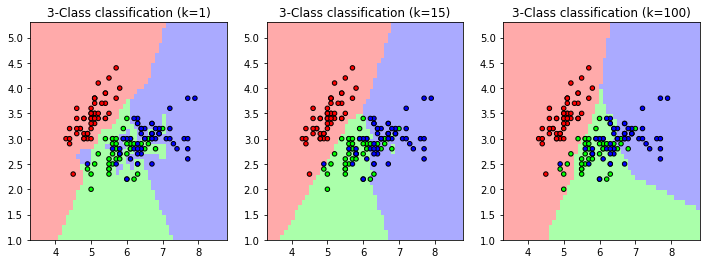

In [22]:
X = iris.data[:, :2]
y = iris.target

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
ks = [1, 15, 100]

plt.figure(figsize=(len(ks)*4, 4))
for ii, k in enumerate(ks):
    plt.subplot(1, len(ks), ii + 1)
    
    clf = neighbors.KNeighborsClassifier(k, weights='uniform')
    clf.fit(X, y)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k={})".format(k))

$k$を小さくすると，KNNは訓練データに対する分類性能は高まりますが，小さくしすぎるとテストデータに対する分類性能（**汎化性能**）は落ちてしまいます．この現象は[過学習](https://ja.wikipedia.org/wiki/%E9%81%8E%E5%89%B0%E9%81%A9%E5%90%88)（overfitting）と呼ばれ，機械学習で最も厄介な問題の一つです．$k$を大きくすると汎化性能が高まりますが，大きくしすぎると訓練データの特徴を取りこぼすようになり，やはり汎化性能は落ちてしまいます．一般に$k$の最適値を求める理論は無いため，[grid search](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)や[cross validation](http://scikit-learn.org/stable/modules/cross_validation.html)を使って網羅的に探索することになります．

## 2.4 モデル選択

## 2.5 教師なし学習

## 2.6 まとめ

## 2.7 ヘルプ

## 2.8 参考文献

* [scikit-learn，A tutorial on statistical-learning for scientific data processing](http://scikit-learn.org/stable/tutorial/statistical_inference/index.html)：本ノートブックのベース．
* [SlideShare，はじめてのパターン認識 第5章 k最近傍法(k_nn法)](https://www.slideshare.net/moa108/5-kknn)：KNNの直感的な解説．